# Tarea 3

### Paulino Moreno Solano

### 1. Conjunto de datos

Paso 1. Importar las librerias

In [1]:
import numpy as np
import pandas as pd

Paso 2. Cargar el conjunto de datos

In [2]:
data = pd.read_csv("winequality-red.csv")

Paso 3. Validar que se cargue completamente al ver la cantidad de filas (1,599) y columnas (12).

In [3]:
data.shape

(1599, 12)

Paso 4. Validar los datos.

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Paso 5. Verificar la existencia de NaN.

In [5]:
data.isnull().values.any()

False

Paso 6. Eliminar los resgistros con NAN, al re cargar el conjunto de datos con los registros que no tienen columnas con NAN.
#### *Nota*: Este paso se omite por que anterior como da False a la existencia de NAN.

In [6]:
# data = data.dropna()

## 2. Modelos Supervisados

### 2.1. Modelo #1. kNN

Paso 1. Importar las librerias

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Paso 2. Seleccionar las variables del data set.

In [8]:
features = data[[ 'fixed acidity'
                 ,'volatile acidity'
                 ,'citric acid'
                 ,'residual sugar'
                 ,'chlorides'
                 ,'free sulfur dioxide'
                 ,'total sulfur dioxide'
                 ,'density'
                 ,'pH'
                 ,'sulphates'
                 ,'alcohol']]

Paso 3. Seleccionar la Etiqueta del conjunto de datos.

In [9]:
labels = data['quality']

Paso 4. Partir el conjunto de datos en training y testing

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, random_state=13)

Paso 5. Inicializar las listas.

In [11]:
training_accuracy = []
test_accuracy = []

Paso 6. Creamos la curva de "training/test acurracy vrs. k"

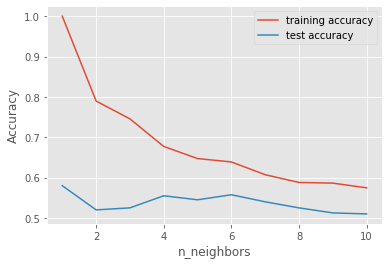

In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### 2.2. Modelo #2. naive Bayes

Paso 1. Importar las librerias

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

Paso 2. Seleccionar las variables del data set.

In [14]:
features = data[[ 'fixed acidity'
                 ,'volatile acidity'
                 ,'citric acid'
                 ,'residual sugar'
                 ,'chlorides'
                 ,'free sulfur dioxide'
                 ,'total sulfur dioxide'
                 ,'density'
                 ,'pH'
                 ,'sulphates'
                 ,'alcohol']]

Paso 3. Seleccionar la Etiqueta del conjunto de datos.

In [15]:
labels = data['quality']

Paso 4. Partir el conjunto de datos en training y testing

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, random_state=13)

Paso 5. Entrenar al sistema con el algoritmo Gaussian NBm

In [17]:
nbg = GaussianNB().fit(X_train, y_train)
print("Training set score: {:.3f}".format(nbg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(nbg.score(X_test, y_test)))

Training set score: 0.562
Test set score: 0.575


### 2.3. Modelo #3. SVM

Paso 1. Importar las librerias

In [18]:
from sklearn.svm import SVC

Paso 2. Seleccionar las variables del data set.

In [19]:
features = data[[ 'fixed acidity'
                 ,'volatile acidity'
                 ,'citric acid'
                 ,'residual sugar'
                 ,'chlorides'
                 ,'free sulfur dioxide'
                 ,'total sulfur dioxide'
                 ,'density'
                 ,'pH'
                 ,'sulphates'
                 ,'alcohol']]

Paso 3. Seleccionar la Etiqueta del conjunto de datos.

In [20]:
labels = data['quality']

Paso 4. Partir el conjunto de datos en training y testing

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, random_state=13)

Paso 5. Analizar el caso de uso de SVM

In [22]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.76
Accuracy on test set: 0.58


Paso 6. Validar visualmente los valores maximos y minimos para este conjunto de datos

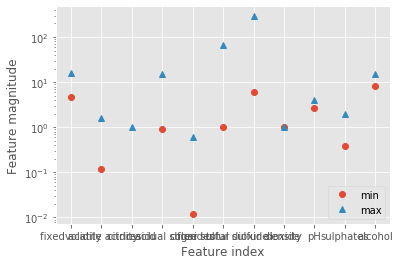

In [23]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

Paso 7. Cambio en la escala de los datos, una escala muy adecuada para estos escenarios es la conversión a [0 ... 1].

In [24]:
# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)

# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training

print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
dtype: float64
Maximum for each feature
 fixed acidity           1.0
volatile acidity        1.0
citric acid             1.0
residual sugar          1.0
chlorides               1.0
free sulfur dioxide     1.0
total sulfur dioxide    1.0
density                 1.0
pH                      1.0
sulphates               1.0
alcohol                 1.0
dtype: float64


In [25]:
# use THE SAME transformation on the test set,
# using min and range of the training set
X_test_scaled = (X_test - min_on_training) / range_on_training

Text(0, 0.5, 'Feature magnitude')

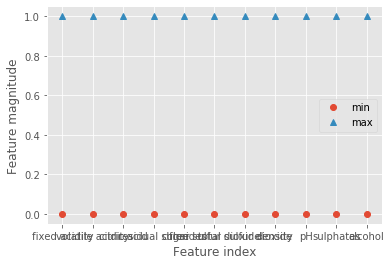

In [26]:
plt.figure()
plt.plot(X_train_scaled.min(axis=0), 'o', label="min")
plt.plot(X_train_scaled.max(axis=0), '^', label="max")
plt.legend(loc=5)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

Paso 8. Evaluar el clasificador con los conjutos de datos escalados.

In [27]:
svc = SVC(gamma='auto')
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.580
Accuracy on test set: 0.575


Paso 8. Encontrar un valor apto para C.

In [28]:
svc = SVC(C=100, gamma='auto')
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.626
Accuracy on test set: 0.565


Paso 9. Encontrar un valor apto para gamma.

In [29]:
svc = SVC(C=100, gamma=10)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.987
Accuracy on test set: 0.623


## 3. Modelos de Ensamble

Los métodos de ensamble (métodos combinados) utilizan múltiples algoritmos de aprendizaje para obtener un rendimiento predictivo que mejore el que podría obtenerse por medio de cualquiera de los algoritmos de aprendizaje individuales que lo constituyen.
<br/>
Los algoritmos de aprendizaje supervisado se describen normalmente como la tarea de buscar a través de un espacio de hipótesis para encontrar la más adecuada que haga buenas predicciones con un problema en particular.
<br/>
EL objetivo principal de los métodos ensamble es considerar múltiples hipótesis simultáneamente para formar una hipótesis que se comporte mejor. El término de __métodos de ensemble__ se usa en combinaciones que hacen uso de múltiples hipótesis pertenecientes a una misma familia, mientras que se usa el término más general de __sistemas de aprendizaje múltiples__ cuando las hipótesis que se combinan provienen de diversas familias.
<br/><br/>
Los métodos de combinación más comunes:
<br/>
__Agregación Bootstrap :__ Tambien conocida por Bagging, es realmente un meta-algoritmo diseñado para conseguir combinaciones de modelos a partir de una familia inicial, provocando una disminución de la varianza y evitando el sobreajuste. Aunque lo más común es aplicarlo con los métodos basados en árboles de decisión, se puede usar con cualquier familia.
<br/>
1.Divide el set de Entrenamiento en distintos sub set de datos, obteniendo como resultado diferentes muestras aleatorias con las siguientes características:
<br/>
--Muestra uniforme (misma cantidad de individuos en cada set).
<br/>
--Muestras con reemplazo (los individuos pueden repetirse en el mismo set de datos).
<br/>
--El tamaño de la muestra es igual al tamaño del set de entrenamiento, pero no contiene a todos los individuos ya que algunos se repiten.
<br/>
--Si se usan muestras sin reemplazo, suele elegirse el 50% de los datos como tamaño de muestra.
<br/>
2.Luego se crea un modelo predictivo con cada set, obteniendo modelos diferentes.
<br/>
3.Luego se construye o ensambla un único modelo predictivo, que es el promedio de todos los modelos. 
<br/>


### 3. Modelo #1. Bagging classifier

Paso 1. Importar las librerias

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression

Paso 2. Seleccionar las variables del data set.

In [31]:
features = data[[ 'fixed acidity'
                 ,'volatile acidity'
                 ,'citric acid'
                 ,'residual sugar'
                 ,'chlorides'
                 ,'free sulfur dioxide'
                 ,'total sulfur dioxide'
                 ,'density'
                 ,'pH'
                 ,'sulphates'
                 ,'alcohol']]

Paso 3. Seleccionar la Etiqueta del conjunto de datos.

In [32]:
labels = data['quality']

Paso 4. Partir el conjunto de datos en training y testing

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, random_state=0)

Paso 5. Entrenar al Modelo

In [34]:
dtc = DecisionTreeClassifier(criterion="entropy")
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(X_train,y_train)

In [35]:
lr = LogisticRegression();
bnb = BernoulliNB()
gnb = GaussianNB()

In [36]:
base_methods=[lr, bnb, gnb, dtc]
for bm  in base_methods:
 print("Method: ", bm)
 bag_model=BaggingClassifier(base_estimator=bm,n_estimators=100,bootstrap=True)
 bag_model=bag_model.fit(X_train,y_train)
 ytest_pred=bag_model.predict(X_test)
 print(bag_model.score(X_test, y_test))
 print(confusion_matrix(y_test, ytest_pred))

Method:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: Futur

C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:469: Futur

C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:469: Futur

C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: Futur

C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC2\.conda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:469: Futur

0.6225
[[  0   0   2   0   0   0]
 [  0   0   9   5   0   0]
 [  0   0 131  37   1   0]
 [  0   0  52 113   5   0]
 [  0   0   3  32   5   0]
 [  0   0   0   3   2   0]]
Method:  BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
0.4225
[[  0   0   2   0   0   0]
 [  0   0  14   0   0   0]
 [  0   0 169   0   0   0]
 [  0   0 170   0   0   0]
 [  0   0  40   0   0   0]
 [  0   0   5   0   0   0]]
Method:  GaussianNB(priors=None, var_smoothing=1e-09)
0.55
[[  0   0   1   1   0   0]
 [  0   0   9   5   0   0]
 [  4   7 111  40   7   0]
 [  0   2  42  88  38   0]
 [  0   0   1  13  21   5]
 [  0   0   0   2   3   0]]
Method:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,


Conclusion Modelos:

El mejor modelo basado en los resultados de Training y Testing es el SVM con el ajuste en Gamma y C con un 62,30%.